# Competition #2: Data Audit Report

## Research Question & Goal:
Is it possible to predict the sale price for each house in our data set? It is our job to predict the sales price for each house. For each Id in the test set, we must predict the value of the SalePrice variable. 

## Business Understanding:
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

A house is a building that functions as a home, ranging from simple dwellings such as rudimentary huts of nomadic tribes and the improvised shacks in shantytowns to complex, fixed structures of wood, brick, concrete or other materials containing plumbing, ventilation and electrical systems. Houses use a range of different roofing systems to keep precipitation such as rain from getting into the dwelling space. Houses may have doors or locks to secure the dwelling space and protect its inhabitants and contents from burglars or other trespassers. Most conventional modern houses in Western cultures will contain one or more bedrooms and bathrooms, a kitchen or cooking area, and a living room. A house may have a separate dining room, or the eating area may be integrated into another room. Some large houses in North America have a recreation room. 

Of all the different possible ways a house can be constructed, and with all the various materials that can be used in its construction, how can one accurately determine the price of a house? Often when we refer to price we refer to sale price of a house. Architecture, foundations, floor space, number of rooms all could play a part in determining the sale price of a house. The data set that has been gathered for the purposes of this report contains 81 variables - 1 ID variable, 1 Target variables (SalePrice) and 79 Predictor variables listed below.    
* MSSubClass: The building class
*     MSZoning: The general zoning classification
*     LotFrontage: Linear feet of street connected to property
*     LotArea: Lot size in square feet
*     Street: Type of road access
*     Alley: Type of alley access
*     LotShape: General shape of property
*     LandContour: Flatness of the property
*     Utilities: Type of utilities available
*     LotConfig: Lot configuration
*     LandSlope: Slope of property
*     Neighborhood: Physical locations within Ames city limits
*     Condition1: Proximity to main road or railroad
*     Condition2: Proximity to main road or railroad (if a second is present)
*     BldgType: Type of dwelling
*     HouseStyle: Style of dwelling
*     OverallQual: Overall material and finish quality
*     OverallCond: Overall condition rating
*     YearBuilt: Original construction date
*     YearRemodAdd: Remodel date
*     RoofStyle: Type of roof
*     RoofMatl: Roof material
*     Exterior1st: Exterior covering on house
*     Exterior2nd: Exterior covering on house (if more than one material)
*     MasVnrType: Masonry veneer type
*     MasVnrArea: Masonry veneer area in square feet
*     ExterQual: Exterior material quality
*     ExterCond: Present condition of the material on the exterior
*     Foundation: Type of foundation
*     BsmtQual: Height of the basement
*     BsmtCond: General condition of the basement
*     BsmtExposure: Walkout or garden level basement walls
*     BsmtFinType1: Quality of basement finished area
*     BsmtFinSF1: Type 1 finished square feet
*     BsmtFinType2: Quality of second finished area (if present)
*     BsmtFinSF2: Type 2 finished square feet
*     BsmtUnfSF: Unfinished square feet of basement area
*     TotalBsmtSF: Total square feet of basement area
*     Heating: Type of heating
*     HeatingQC: Heating quality and condition
*     CentralAir: Central air conditioning
*     Electrical: Electrical system
*     1stFlrSF: First Floor square feet
*     2ndFlrSF: Second floor square feet
*     LowQualFinSF: Low quality finished square feet (all floors)
*     GrLivArea: Above grade (ground) living area square feet
*     BsmtFullBath: Basement full bathrooms
*     BsmtHalfBath: Basement half bathrooms
*     FullBath: Full bathrooms above grade
*     HalfBath: Half baths above grade
*     Bedroom: Number of bedrooms above basement level
*     Kitchen: Number of kitchens
*     KitchenQual: Kitchen quality
*     TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
*     Functional: Home functionality rating
*     Fireplaces: Number of fireplaces
*     FireplaceQu: Fireplace quality
*     GarageType: Garage location
*     GarageYrBlt: Year garage was built
*     GarageFinish: Interior finish of the garage
*     GarageCars: Size of garage in car capacity
*     GarageArea: Size of garage in square feet
*     GarageQual: Garage quality
*     GarageCond: Garage condition
*     PavedDrive: Paved driveway
*     WoodDeckSF: Wood deck area in square feet
*     OpenPorchSF: Open porch area in square feet
*     EnclosedPorch: Enclosed porch area in square feet
*     3SsnPorch: Three season porch area in square feet
*     ScreenPorch: Screen porch area in square feet
*     PoolArea: Pool area in square feet
*     PoolQC: Pool quality
*     Fence: Fence quality
*     MiscFeature: Miscellaneous feature not covered in other categories
*     MiscVal: Value of miscellaneous feature
*     MoSold: Month Sold
*     YrSold: Year Sold
*     SaleType: Type of sale
*     SaleCondition: Condition of sale
   


## Data Understanding
Our data set is divided into two parts, a training set and a testing set. Each data set contains the same number of columns and rows - 1460x81. For the purposes of this report we will be focusing on the training set with the understanding that any task or transformation carried out on the training set will be carried out on the test set. Our variables have the following breakdown: 36 are quantitative, 43 categorical and then Id and SalePrice are viewed as separate as ID offers no predicitve value and SalePrice is the target variable.

In [24]:
# Importing useful packages
import numpy as np
from scipy import stats
import pandas as pd
import sklearn as sk
import seaborn as sb
import datetime as dt
import pylab 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# from new_var import calc,y1function,y2function,C3function,C6function
# from outliers import outlier
# from Standardising import standard
#from Recoding_SIC_Codes import Industry_Division
%matplotlib inline
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.cross_validation import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import precision_recall_fscore_support


# Read in Data file and define NaN values
housetrain = pd.read_csv("train.csv",header=0,na_values='None')
housetrain.MSSubClass = housetrain.MSSubClass.astype(str)

Reading in the data into our python workspace, we had to change one of our integer variables to be a string for ease as it was not a ordinal categorical variarble. We then print out our data types to make sure we are happy woth them.

In [25]:
# Print types
pd.set_option('display.max_rows', 82)
print(housetrain.dtypes)

Id                 int64
MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


Next we do a data describe to see summary statistics of our data. As we can see below some of our data has missing values. 

In [26]:
# Data describe
pd.set_option('display.max_columns', 500)
print(housetrain.describe())

                Id  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    70.049958   10516.828082     6.099315     5.575342   
std     421.610009    24.284752    9981.264932     1.382997     1.112799   
min       1.000000    21.000000    1300.000000     1.000000     1.000000   
25%     365.750000    59.000000    7553.500000     5.000000     5.000000   
50%     730.500000    69.000000    9478.500000     6.000000     5.000000   
75%    1095.250000    80.000000   11601.500000     7.000000     6.000000   
max    1460.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000

As we saw in our summary statistics, some of our variables contain missing data. This is by and large due to the formatting of the data in its use of "NA" to show when a house doesn't contain a feature. Nonethe less it was decided to use it as missing initially to investigate if any variables contained a imbalances due to missing data.

In [27]:
# Get numeric value to missing features
for i in range(len(housetrain.columns)):
    j = housetrain.columns[i]
    miss=((1460-housetrain[str(j)].count())/1460)*100
    print("The missingness of variable {}".format(j))
    print("{0:.2f}%".format(miss))

The missingness of variable Id
0.00%
The missingness of variable MSSubClass
0.00%
The missingness of variable MSZoning
0.00%
The missingness of variable LotFrontage
17.74%
The missingness of variable LotArea
0.00%
The missingness of variable Street
0.00%
The missingness of variable Alley
93.77%
The missingness of variable LotShape
0.00%
The missingness of variable LandContour
0.00%
The missingness of variable Utilities
0.00%
The missingness of variable LotConfig
0.00%
The missingness of variable LandSlope
0.00%
The missingness of variable Neighborhood
0.00%
The missingness of variable Condition1
0.00%
The missingness of variable Condition2
0.00%
The missingness of variable BldgType
0.00%
The missingness of variable HouseStyle
0.00%
The missingness of variable OverallQual
0.00%
The missingness of variable OverallCond
0.00%
The missingness of variable YearBuilt
0.00%
The missingness of variable YearRemodAdd
0.00%
The missingness of variable RoofStyle
0.00%
The missingness of variable Roo

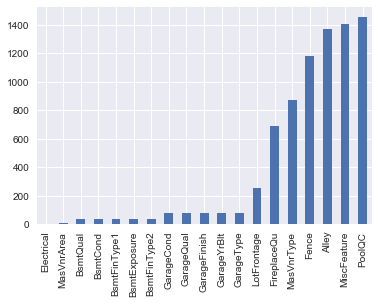

In [28]:
missing = housetrain.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

The most obvious example of missing is *PoolQC*. Looking at the graph it has the most number of missing values as most people probably do not have a pool in their house. Looking at the main culprits of missing values, we actaully see it makes sense that these variables contain so much missing. *MiscFeature* is for features like tennis courts, second garages, elevators and not many families can afford these types of add ons to their home. For the moment, it was decided to keep them as the few houses they do affect would see a dramatic increase in their sale price because of these features. Anything with around 50% of the data missing should be removed from further analysis, meaning we remove the following variables:
* *PoolQC*
* *MiscFeature*
* *Alley*
* *Fence*
* *MasVnrType*
* *FireplaceQu* 



In [29]:
dropmissing=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','MasVnrType']
housetrain.drop(dropmissing,axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,0,1,2008,WD,Normal,118000


## Imputation
As we saw, the biggest culprits of our missing data have perfectly logical reasons behind it. With that in mind it was decided to fill in the NA values using either string representations of what was really going on (i.e. no pool) or zero.

In [30]:
# Alley : data description says NA means "no alley access"
housetrain.loc[:, "Alley"] = housetrain.loc[:, "Alley"].fillna("None")
# BedroomAbvGr : NA most likely means 0
housetrain.loc[:, "BedroomAbvGr"] = housetrain.loc[:, "BedroomAbvGr"].fillna(0)
# BsmtQual etc : data description says NA for basement features is "no basement"
housetrain.loc[:, "BsmtQual"] = housetrain.loc[:, "BsmtQual"].fillna("No")
housetrain.loc[:, "BsmtCond"] = housetrain.loc[:, "BsmtCond"].fillna("No")
housetrain.loc[:, "BsmtExposure"] = housetrain.loc[:, "BsmtExposure"].fillna("No")
housetrain.loc[:, "BsmtFinType1"] = housetrain.loc[:, "BsmtFinType1"].fillna("No")
housetrain.loc[:, "BsmtFinType2"] = housetrain.loc[:, "BsmtFinType2"].fillna("No")
housetrain.loc[:, "BsmtFullBath"] = housetrain.loc[:, "BsmtFullBath"].fillna(0)
housetrain.loc[:, "BsmtHalfBath"] = housetrain.loc[:, "BsmtHalfBath"].fillna(0)
housetrain.loc[:, "BsmtUnfSF"] = housetrain.loc[:, "BsmtUnfSF"].fillna(0)
# CentralAir : NA most likely means No
housetrain.loc[:, "CentralAir"] = housetrain.loc[:, "CentralAir"].fillna("N")
# Condition : NA most likely means Normal
housetrain.loc[:, "Condition1"] = housetrain.loc[:, "Condition1"].fillna("Norm")
housetrain.loc[:, "Condition2"] = housetrain.loc[:, "Condition2"].fillna("Norm")
# EnclosedPorch : NA most likely means no enclosed porch
housetrain.loc[:, "EnclosedPorch"] = housetrain.loc[:, "EnclosedPorch"].fillna(0)
# External stuff : NA most likely means average
housetrain.loc[:, "ExterCond"] = housetrain.loc[:, "ExterCond"].fillna("TA")
housetrain.loc[:, "ExterQual"] = housetrain.loc[:, "ExterQual"].fillna("TA")
# Fence : data description says NA means "no fence"
#housetrain.loc[:, "Fence"] = housetrain.loc[:, "Fence"].fillna("No")
# FireplaceQu : data description says NA means "no fireplace"
#housetrain.loc[:, "FireplaceQu"] = housetrain.loc[:, "FireplaceQu"].fillna("No")
housetrain.loc[:, "Fireplaces"] = housetrain.loc[:, "Fireplaces"].fillna(0)
# Functional : data description says NA means typical
housetrain.loc[:, "Functional"] = housetrain.loc[:, "Functional"].fillna("Typ")
# GarageType etc : data description says NA for garage features is "no garage"
housetrain.loc[:, "GarageType"] = housetrain.loc[:, "GarageType"].fillna("No")
housetrain.loc[:, "GarageFinish"] = housetrain.loc[:, "GarageFinish"].fillna("No")
housetrain.loc[:, "GarageQual"] = housetrain.loc[:, "GarageQual"].fillna("No")
housetrain.loc[:, "GarageCond"] = housetrain.loc[:, "GarageCond"].fillna("No")
housetrain.loc[:, "GarageArea"] = housetrain.loc[:, "GarageArea"].fillna(0)
housetrain.loc[:, "GarageCars"] = housetrain.loc[:, "GarageCars"].fillna(0)
# HalfBath : NA most likely means no half baths above grade
housetrain.loc[:, "HalfBath"] = housetrain.loc[:, "HalfBath"].fillna(0)
# HeatingQC : NA most likely means typical
housetrain.loc[:, "HeatingQC"] = housetrain.loc[:, "HeatingQC"].fillna("TA")
# KitchenAbvGr : NA most likely means 0
housetrain.loc[:, "KitchenAbvGr"] = housetrain.loc[:, "KitchenAbvGr"].fillna(0)
# KitchenQual : NA most likely means typical
housetrain.loc[:, "KitchenQual"] = housetrain.loc[:, "KitchenQual"].fillna("TA")
# LotFrontage : NA most likely means no lot frontage
housetrain.loc[:, "LotFrontage"] = housetrain.loc[:, "LotFrontage"].fillna(0)
# LotShape : NA most likely means regular
housetrain.loc[:, "LotShape"] = housetrain.loc[:, "LotShape"].fillna("Reg")
# MasVnrType : NA most likely means no veneer
#housetrain.loc[:, "MasVnrType"] = housetrain.loc[:, "MasVnrType"].fillna("None")
housetrain.loc[:, "MasVnrArea"] = housetrain.loc[:, "MasVnrArea"].fillna(0)
# MiscFeature : data description says NA means "no misc feature"
#housetrain.loc[:, "MiscFeature"] = housetrain.loc[:, "MiscFeature"].fillna("No")
housetrain.loc[:, "MiscVal"] = housetrain.loc[:, "MiscVal"].fillna(0)
# OpenPorchSF : NA most likely means no open porch
housetrain.loc[:, "OpenPorchSF"] = housetrain.loc[:, "OpenPorchSF"].fillna(0)
# PavedDrive : NA most likely means not paved
housetrain.loc[:, "PavedDrive"] = housetrain.loc[:, "PavedDrive"].fillna("N")
# PoolQC : data description says NA means "no pool"
#housetrain.loc[:, "PoolQC"] = housetrain.loc[:, "PoolQC"].fillna("No")
housetrain.loc[:, "PoolArea"] = housetrain.loc[:, "PoolArea"].fillna(0)
# SaleCondition : NA most likely means normal sale
housetrain.loc[:, "SaleCondition"] = housetrain.loc[:, "SaleCondition"].fillna("Normal")
# ScreenPorch : NA most likely means no screen porch
housetrain.loc[:, "ScreenPorch"] = housetrain.loc[:, "ScreenPorch"].fillna(0)
# TotRmsAbvGrd : NA most likely means 0
housetrain.loc[:, "TotRmsAbvGrd"] = housetrain.loc[:, "TotRmsAbvGrd"].fillna(0)
# Utilities : NA most likely means all public utilities
housetrain.loc[:, "Utilities"] = housetrain.loc[:, "Utilities"].fillna("AllPub")
# WoodDeckSF : NA most likely means no wood deck
housetrain.loc[:, "WoodDeckSF"] = housetrain.loc[:, "WoodDeckSF"].fillna(0)

## Recoding
Recoding involves substituting the values of a variable with values that are more useful. Recoding is done for a number of reasons; to create a more balanced variable by grouping small occurances, to reduce the number of distinct values, to group similar values together and so on. It is an important feature in data analysis as it helps to reduce the curse of dimensionaility later when we create dummy variables for our categorical variables.

In this section, we will be conducting an initial recoding of our variables. This will be based on trying to keep a variable having no more than 5 distinct values. Groupings will be done using the methods listed above. The first task is to get the frequency counts of our current values in each variable as we will see below.

In [31]:
# Graphing missing data
group = housetrain.columns.to_series().groupby(housetrain.dtypes).groups # grouping columns by type
groups={k.name: v for k, v in group.items()} #  creating as dictionary

# Taking only the object type col names
objects=housetrain[groups['object'].values]
#print(objects.head(5))
# Printing freqiency counts
for i in objects.columns:
        #print('{} \n' .format(objects[i]))
        print(objects[i].value_counts())
        print('\n')

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Pave    1454
Grvl       6
Name: Street, dtype: int64


None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64


Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawf

In [32]:
# Recoding to have less options and grouping similar
housetrain['SaleType']=housetrain['SaleType'].replace(['WD','CWD','VWD'],'Warrenty Deed')
housetrain['SaleType']=housetrain['SaleType'].replace(['Con','ConLw','ConLI','ConLD'],'Contract')
#print(housetrain['SaleType'].value_counts())

# Recoding to have less options and grouping similar
housetrain['GarageCond']=housetrain['GarageCond'].replace(['Ex','Gd'],'Above Average')
housetrain['GarageCond']=housetrain['GarageCond'].replace(['Fa','Po'],'Below Average')
#print(housetrain['GarageCond'].value_counts())

# Recoding to have less options and grouping similar
housetrain['GarageQual']=housetrain['GarageQual'].replace(['Ex','Gd'],'Above Average')
housetrain['GarageQual']=housetrain['GarageQual'].replace(['Fa','Po'],'Below Average')
#print(housetrain['GarageQual'].value_counts())

# Recoding to have less options and grouping similar
housetrain['Functional']=housetrain['Functional'].replace(['Min1','Min2'],'Min')
housetrain['Functional']=housetrain['Functional'].replace(['Maj1','Maj2','Sev','Sal'],'Maj')
#print(housetrain['Functional'].value_counts())

# Recoding to have less options and grouping similar
housetrain['KitchenQual']=housetrain['KitchenQual'].replace(['Ex','Gd'],'Above Average')
housetrain['KitchenQual']=housetrain['KitchenQual'].replace(['Fa','Po'],'Below Average')
#print(housetrain['KitchenQual'].value_counts())

# Recoding to have less options and grouping similar
housetrain['HeatingQC']=housetrain['HeatingQC'].replace(['Ex','Gd'],'Above Average')
housetrain['HeatingQC']=housetrain['HeatingQC'].replace(['Fa','Po'],'Below Average')
#print(housetrain['HeatingQC'].value_counts())

# Merging Gas
housetrain['Heating']=housetrain['Heating'].replace(['GasA','GasW'],'Gas')
#print(housetrain['Heating'].value_counts())

# Recoding to have less options and grouping similar
housetrain['BsmtFinType2']=housetrain['BsmtFinType2'].replace(['ALQ','Rec'],'Average')
housetrain['BsmtFinType2']=housetrain['BsmtFinType2'].replace(['BLQ','LwQ'],'Below Average')
#print(housetrain['BsmtFinType2'].value_counts())

# Recoding to have less options and grouping similar
housetrain['BsmtFinType1']=housetrain['BsmtFinType1'].replace(['ALQ','Rec'],'Average')
housetrain['BsmtFinType1']=housetrain['BsmtFinType1'].replace(['BLQ','LwQ'],'Below Average')
#print(housetrain['BsmtFinType1'].value_counts())

# Recoding to have less options and grouping similar
housetrain['BsmtCond']=housetrain['BsmtCond'].replace(['Ex','Gd'],'Above Average')
housetrain['BsmtCond']=housetrain['BsmtCond'].replace(['Fa','Po'],'Below Average')
#print(housetrain['BsmtCond'].value_counts())

# Recoding to have less options and grouping similar
housetrain['BsmtQual']=housetrain['BsmtQual'].replace(['Ex','Gd'],'Above Average')
housetrain['BsmtQual']=housetrain['BsmtQual'].replace(['Fa','Po'],'Below Average')
#print(housetrain['BsmtQual'].value_counts())

# Foundation: One of the more standard options or other
housetrain['Foundation']=housetrain['Foundation'].replace(['BrkTil','Slab','Stone','Wood'],'Other')
#print(housetrain['Foundation'].value_counts())


# reg or irreg
housetrain['LotShape']=housetrain['LotShape'].replace(['IR1','IR2','IR3'],'IRReg')
#print(housetrain['LotShape'].value_counts())

# flat or not flat
housetrain['LandContour']=housetrain['LandContour'].replace(['Bnk','HLS','Low'],'NotFlat')
#print(housetrain['LandContour'].value_counts())

# combined frontage
housetrain['LotConfig']=housetrain['LotConfig'].replace(['FR2','FR3'],'Frontage')
#print(housetrain['LotConfig'].value_counts())

# combined rail and pos
housetrain['Condition1']=housetrain['Condition1'].replace(['RRNn','RRAn','RRNe','RRAe'],'Rail')
housetrain['Condition1']=housetrain['Condition1'].replace(['PosN','PosA'],'Pos')
#print(housetrain['Condition1'].value_counts())

# combined rail and pos
housetrain['Condition2']=housetrain['Condition2'].replace(['RRNn','RRAn','RRNe','RRAe'],'Rail')
housetrain['Condition2']=housetrain['Condition2'].replace(['PosN','PosA'],'Pos')
#print(housetrain['Condition2'].value_counts())

# Recoding to have less options and grouping similar
housetrain['ExterQual']=housetrain['ExterQual'].replace(['Ex','Gd'],'Above Average')
housetrain['ExterQual']=housetrain['ExterQual'].replace(['Fa','Po'],'Below Average')
#print(housetrain['ExterQual'].value_counts())

# Recoding to have less options and grouping similar
housetrain['ExterCond']=housetrain['ExterCond'].replace(['Ex','Gd'],'Above Average')
housetrain['ExterCond']=housetrain['ExterCond'].replace(['Fa','Po'],'Below Average')
#print(housetrain['ExterCond'].value_counts())

housetrain['HouseStyle']=housetrain['HouseStyle'].replace(['1Story','1.5Unf','1.5Fin'],'1to2Story')
housetrain['HouseStyle']=housetrain['HouseStyle'].replace(['2Story','2.5Unf','2.5Fin'],'2+Story')
#print(housetrain['HouseStyle'].value_counts())

housetrain['RoofStyle']=housetrain['RoofStyle'].replace(['Flat','Gambrel','Mansard','Shed'],'Other')
#print(housetrain['RoofStyle'].value_counts())

housetrain['RoofMatl']=housetrain['RoofMatl'].replace(['ClyTile','Membran','Metal','Roll','Tar&Grv','WdShake','WdShngl'],'Other')
#print(housetrain['RoofMatl'].value_counts())

Warrenty Deed    1271
New               122
COD                43
Contract           21
Oth                 3
Name: SaleType, dtype: int64
TA               1326
No                 81
Below Average      42
Above Average      11
Name: GarageCond, dtype: int64
TA               1311
No                 81
Below Average      51
Above Average      17
Name: GarageQual, dtype: int64
Typ    1360
Min      65
Maj      20
Mod      15
Name: Functional, dtype: int64
TA               735
Above Average    686
Below Average     39
Name: KitchenQual, dtype: int64
Above Average    982
TA               428
Below Average     50
Name: HeatingQC, dtype: int64
Gas      1446
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
Unf              1256
Below Average      79
Average            73
No                 38
GLQ                14
Name: BsmtFinType2, dtype: int64
Unf              430
GLQ              418
Average          353
Below Average    222
No                37
Name: Bsmt

In [33]:
# Encode some categorical features as ordered numbers when there is information in the order
housetrain = housetrain.replace({"BsmtCond" : {"No" : 0, "Below Average" : 1, "TA" : 2, "Above Average":3},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},

                       "BsmtQual" : {"No" : 0, "Below Average" : 1, "TA" : 2, "Above Average":3},
                       "ExterCond" : {"Below Average" : 1, "TA" : 2, "Above Average":3},
                       "ExterQual" : {"Below Average" : 1, "TA" : 2, "Above Average":3},
                       
                       "Functional" : {"Maj" : 1,"Min" : 2, "Typ" : 3},
                       "GarageCond" : {"No" : 0, "Below Average" : 1, "TA" : 2, "Above Average":3},
                       "GarageQual" : {"No" : 0, "Below Average" : 1, "TA" : 2, "Above Average":3},
                       "HeatingQC" : {"Below Average" : 1, "TA" : 2, "Above Average":3},
                       "KitchenQual" : {"Below Average" : 1, "TA" : 2, "Above Average":3},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3}}
                     )

# Create new features
# 1* Simplifications of existing features
housetrain["OverallQual"] = housetrain.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
housetrain["OverallCond"] = housetrain.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })


housetrain["ExterCond"] = housetrain.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
housetrain["ExterQual"] = housetrain.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
group = housetrain.columns.to_series().groupby(housetrain.dtypes).groups # grouping columns by type
groups={k.name: v for k, v in group.items()} #  creating as dictionary

# Taking only the object type col names
objects=housetrain[groups['object'].values]
for i in objects.columns:
        #print('{} \n' .format(objects[i]))
        print(objects[i].value_counts())
        print('\n')

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Pave    1454
Grvl       6
Name: Street, dtype: int64


None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64


Reg      925
IRReg    535
Name: LotShape, dtype: int64


Lvl        1311
NotFlat     149
Name: LandContour, dtype: int64


AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


Inside      1052
Corner       263
CulDSac       94
Frontage      51
Name: LotConfig, dtype: int64


NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25

## Normalising

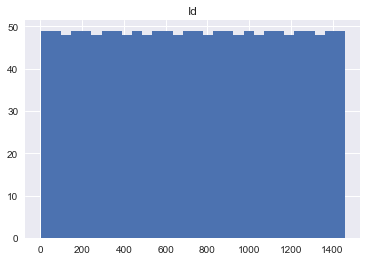

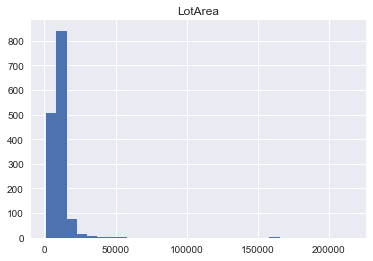

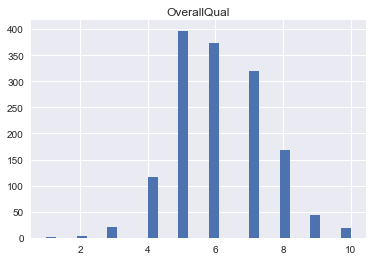

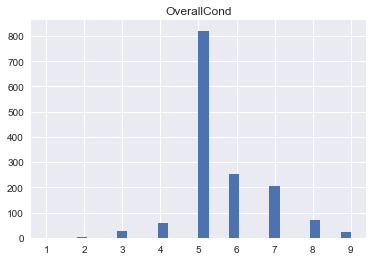

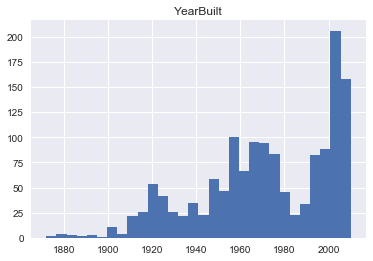

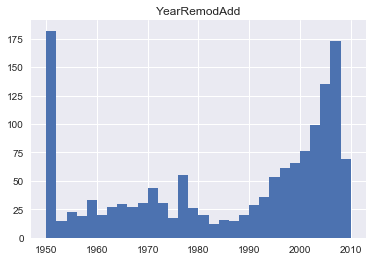

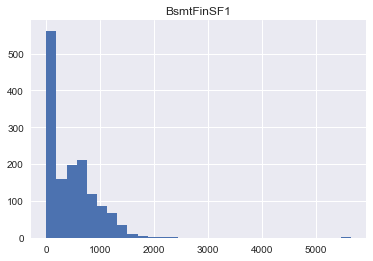

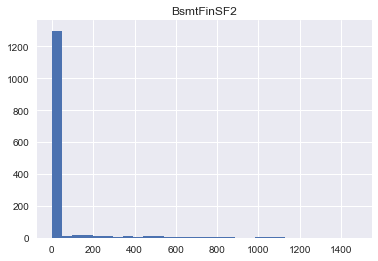

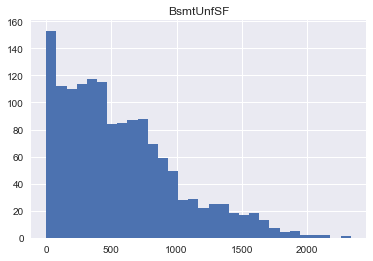

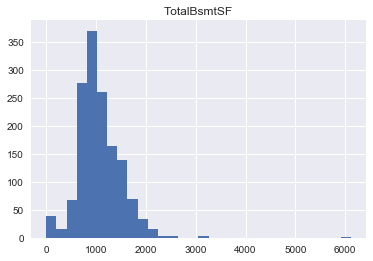

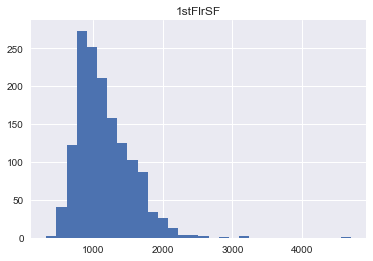

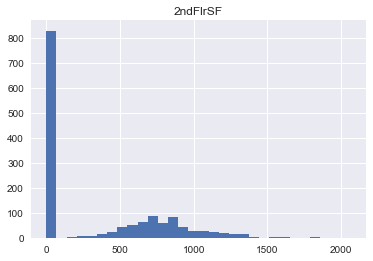

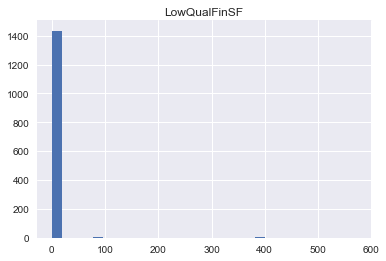

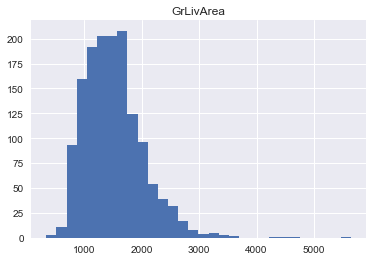

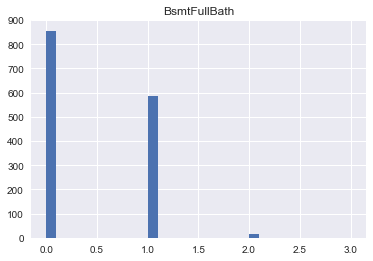

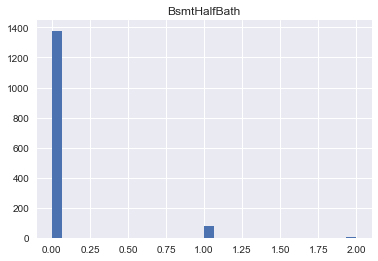

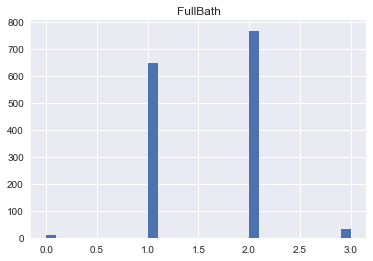

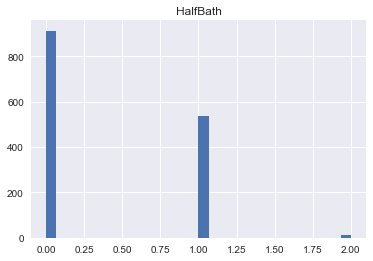

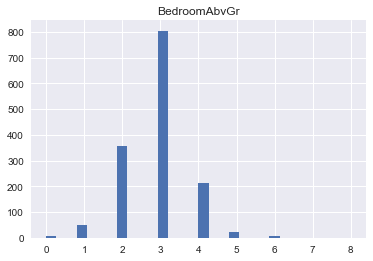

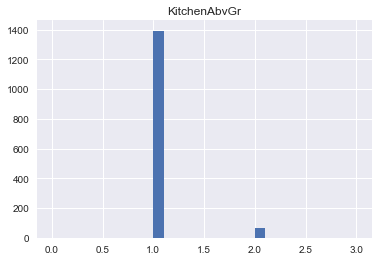

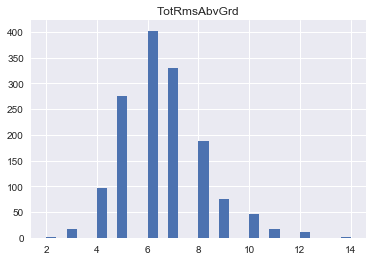

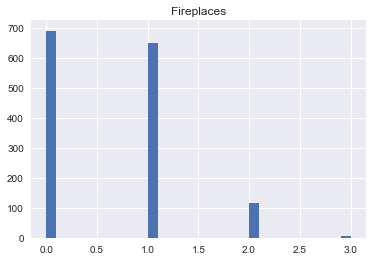

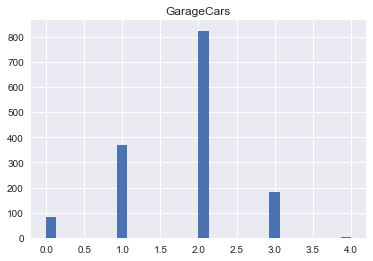

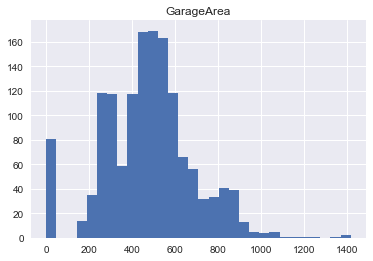

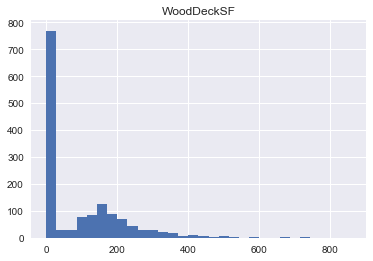

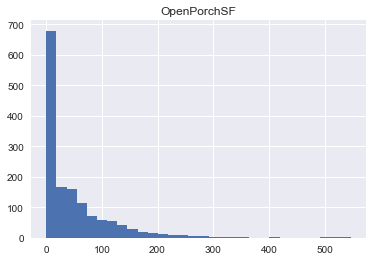

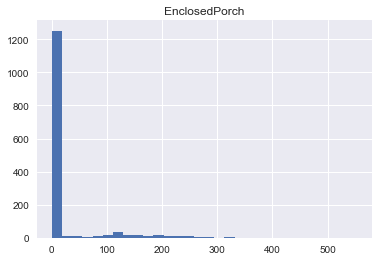

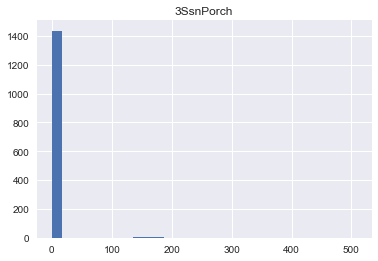

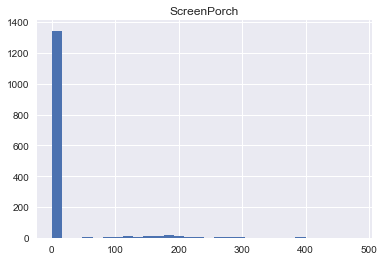

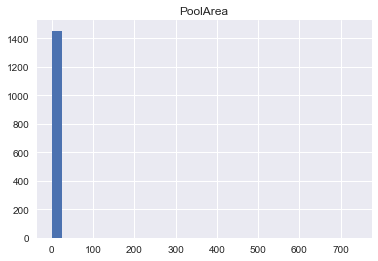

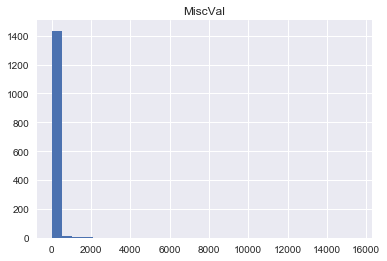

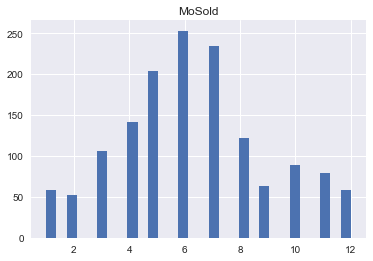

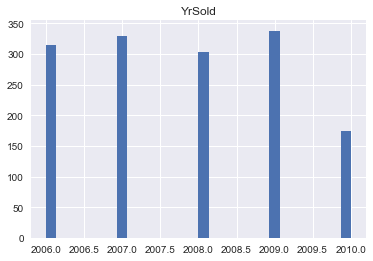

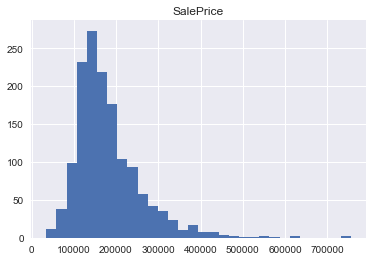

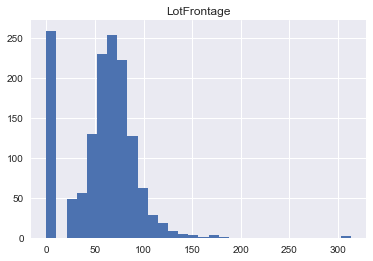

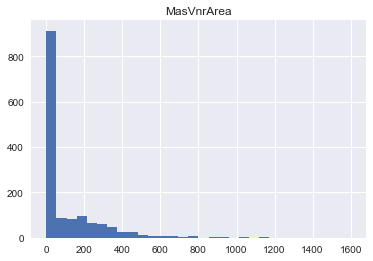

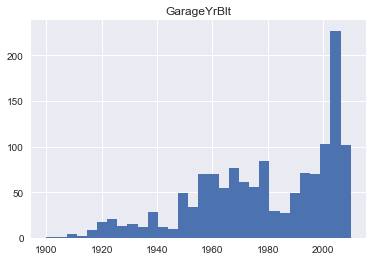

In [8]:
# Printing plots for int 64 and float64
cont_plot=housetrain[groups['int64'].values]
for i in range(len(cont_plot.columns)):
        plt.hist(cont_plot.iloc[:,i].dropna(),bins=30)
        plt.title('%s' % cont_plot.columns[i])
        plt.show()
cont_plot=housetrain[groups['float64'].values]
for i in range(len(cont_plot.columns)):
        plt.hist(cont_plot.iloc[:,i].dropna(),bins=30)
        plt.title('%s' % cont_plot.columns[i])
        plt.show()

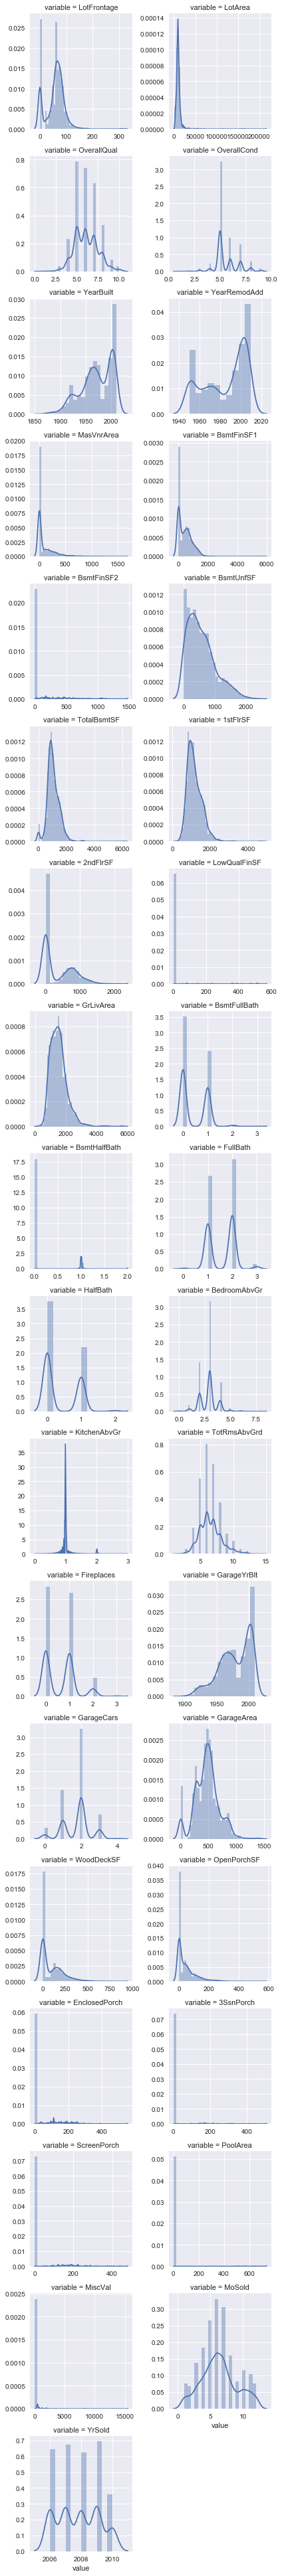

In [9]:
quantitative = [f for f in housetrain.columns if housetrain.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in housetrain.columns if housetrain.dtypes[f] == 'object']

import seaborn as sns

f = pd.melt(housetrain, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

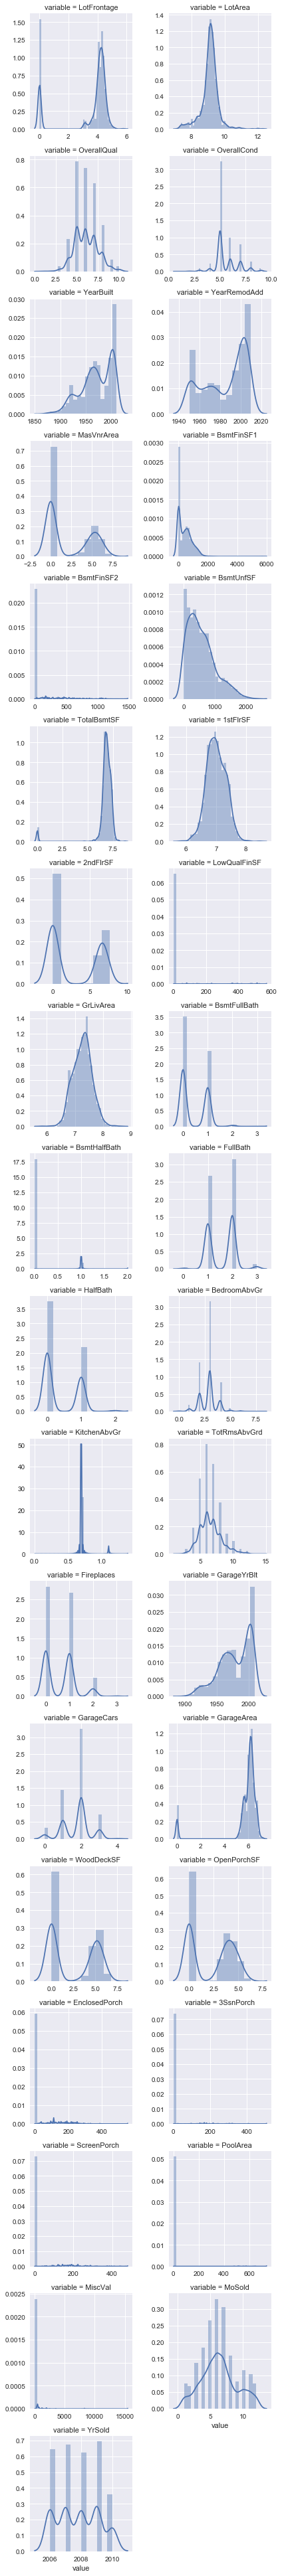

In [10]:
def log_transform(feature):
    housetrain[feature] = np.log1p(housetrain[feature].values) # does a log transform on x+1

#log transforming variables
log_transform('GrLivArea')
log_transform('1stFlrSF')
log_transform('2ndFlrSF')
log_transform('TotalBsmtSF')
log_transform('LotArea')
log_transform('LotFrontage')
log_transform('KitchenAbvGr')
log_transform('GarageArea')
log_transform('MasVnrArea')
log_transform('WoodDeckSF')
log_transform('OpenPorchSF')
f = pd.melt(housetrain, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")